# Linear Regression Notebook
**Adam Fletcher** <br>
08 APR 19 <br>
Version 1 <br>
<br>
Useful Links: <br>
> https://uk.mathworks.com/help/stats/regression-and-anova.html

**TODO:** 
- Table of contents
- Can I make more generic?
- Fix error warnings on single SVR


### Table of Contents
- [Data Import](#Data_Import)

### Prerequisites

In [19]:
!pip install pandas
%matplotlib inline

import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
from scipy import stats
from IPython.display import display, HTML
import seaborn

import time
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RANSACRegressor, LinearRegression, TheilSenRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import Ridge,Lasso,ElasticNet,BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from IPython.display import Image

<a id='Data_Import'></a>
### Data Import
Data should be imported with the __variable name = data__

In [6]:
# Data Import
data = pd.read_excel('/Users/adam/Downloads/Concrete_Data.xls')
data.columns = ['cement_component', 'furnace_slag', 'flay_ash', 'water_component', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age', 'concrete_strength']


# Print info about the imported data
print("Length of Data Frame:", len(data), "rows and", len(data.columns), "columns")
data.head()

Length of Data Frame: 1030 rows and 9 columns


,cement_component,furnace_slag,flay_ash,water_component,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Splitting Data into Test and Train Datasets

70% of data is set as the training dataset with 30% being the testing dataset 

**Code Below:** 'concrete_strength' is the **dependent** variable. i.e the one we want to predict

In [138]:
def split_train_test(data, featurex, featurey, train_index=0.7):

    train, test = train_test_split(data, test_size = 1-train_index)

    if type(feature) == list:
        x_train = train[featurex].as_matrix()
        y_train = train[featurey].as_matrix()

        x_test = test[featurex].as_matrix()
        y_test = test[featurey].as_matrix()

    else:
        x_train = [[x] for x in list(train[featurex])]
        y_train = [[x] for x in list(train[featurey])]

        x_test = [[x] for x in list(test[featurex])]
        y_test = [[x] for x in list(test[featurey])]

    return x_train, y_train, x_test, y_test

### Linear Regression Matrix

Significant **positive-only** correlations (>= 0.1) shown in bold <br>
**TODO:** Fix to also include negative correlations

CEMENT COMPONENT
R2: cement_component vs furnace_slag = 0.11063877476370443
R2: cement_component vs flay_ash = 0.12551188005396718
R2: cement_component vs water_component = 0.00242769474625415
R2: cement_component vs superplasticizer = 0.06542188404512383
R2: cement_component vs coarse_aggregate = 0.0202837412450797
R2: cement_component vs fine_aggregate = 0.061018264024251145
R2: cement_component vs age = -0.0012620525725768328
R2: cement_component vs concrete_strength = 0.286766104337818
FURNACE SLAG
R2: furnace_slag vs cement_component = 0.07336588230241337
R2: furnace_slag vs flay_ash = -0.011806700041997242
R2: furnace_slag vs water_component = 0.06803744234614728
R2: furnace_slag vs superplasticizer = 0.009993720596572109
R2: furnace_slag vs coarse_aggregate = -0.0017226243583909895
R2: furnace_slag vs fine_aggregate = 0.09416625664747735
R2: furnace_slag vs age = -0.0021364036705111555
R2: furnace_slag vs concrete_strength = 0.01318764259163363
FLAY ASH
R2: flay_ash vs cement_co

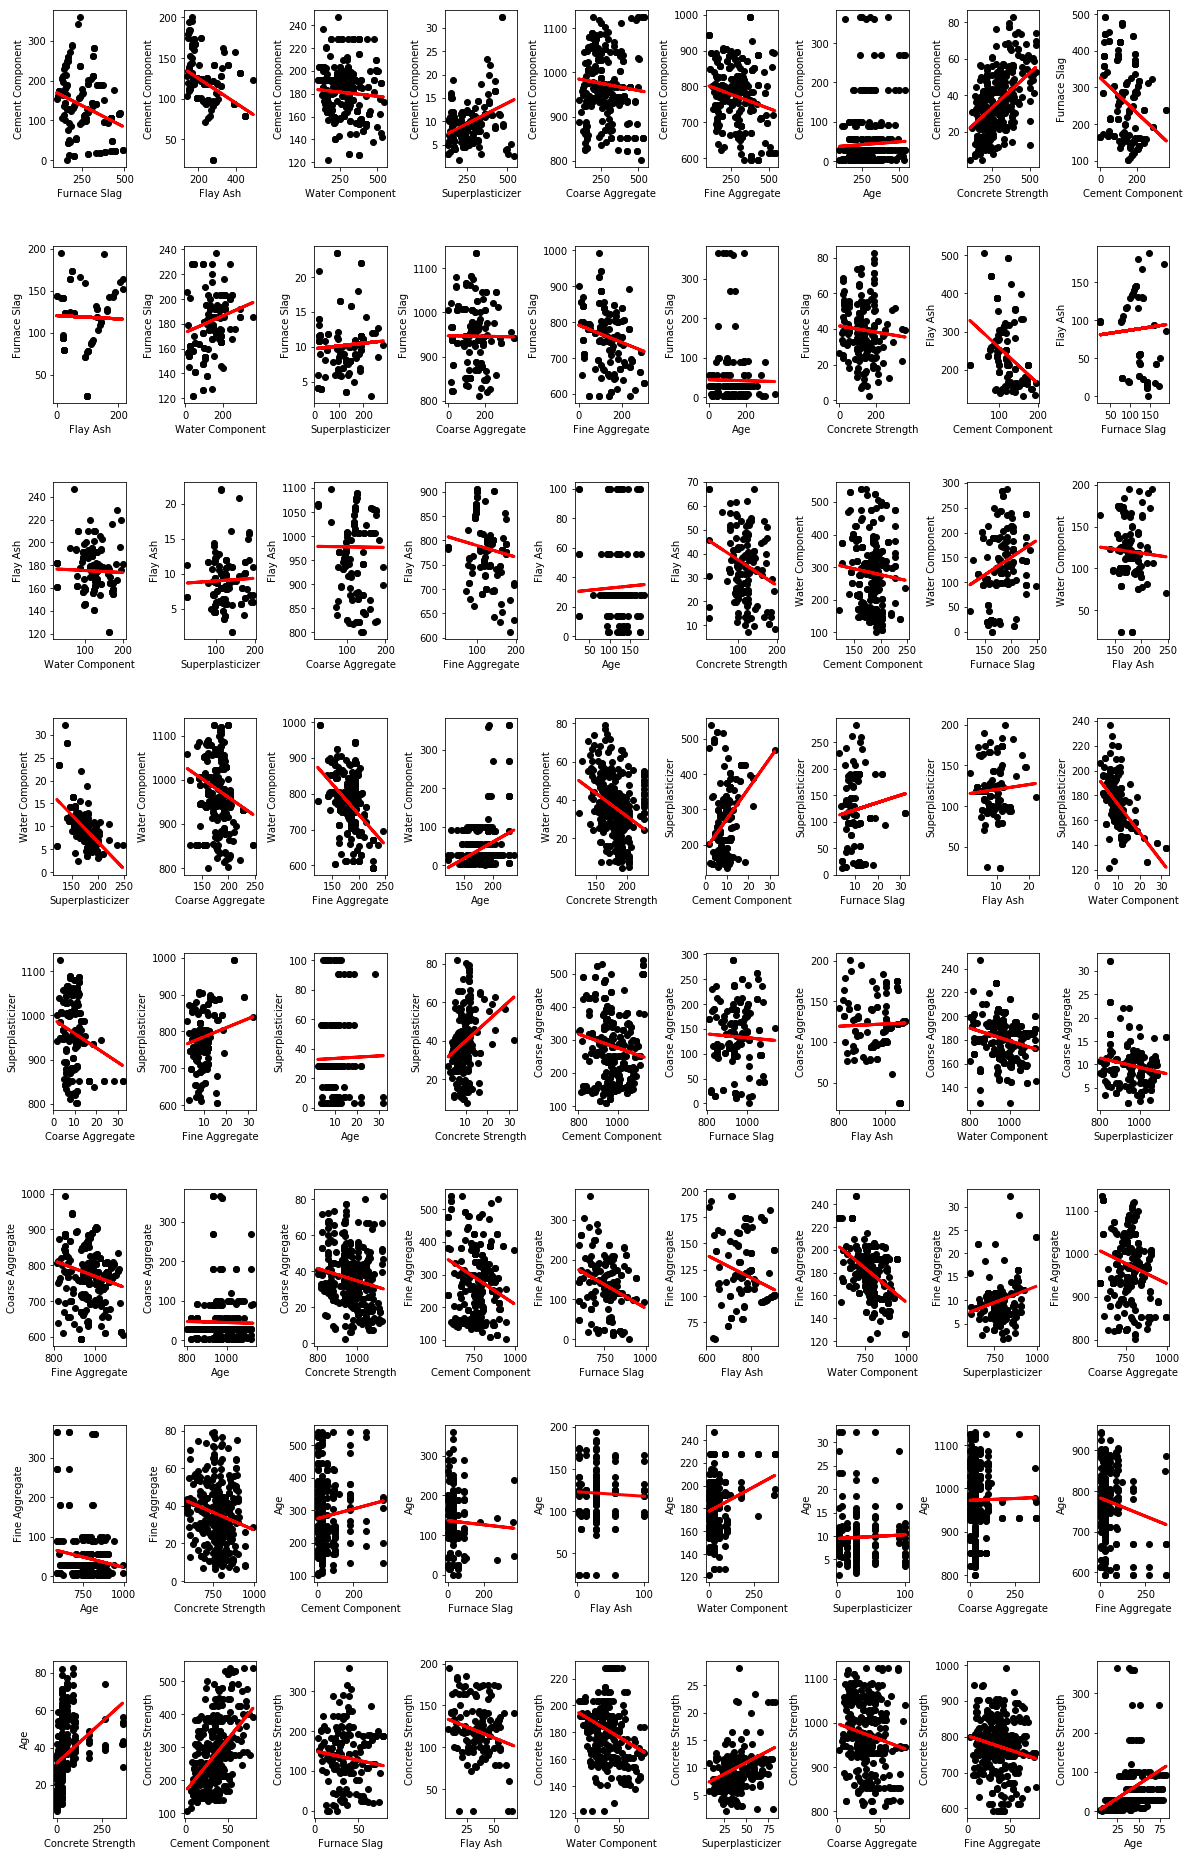

In [111]:
plt.figure(figsize=(20,120))
plot_count = 1

for featurex in data.columns:
    print('\033[0m' + featurex.replace('_',' ').upper())
    
    for featurey in data.columns:
        
        if featurex == featurey:
            plot_count = plot_count
        
        else:
            
            data_tr = data[[featurex, featurey]]
            data_tr=data_tr[(data_tr.T != 0).all()]

            x_train, y_train, x_test, y_test = split_train_test(data_tr, featurex, featurey)

            # Create linear regression object
            regr = LinearRegression()

            # Train the model using the training sets
            regr.fit(x_train, y_train)
            y_pred = regr.predict(x_test)

            # Plot outputs
            plt.subplot(28, len(data.columns),plot_count)

            plt.scatter(x_test, y_test,  color='black')
            plt.plot(x_test, y_pred, color='red', linewidth=3)
            plt.xlabel(featurey.replace('_',' ').title())
            plt.ylabel(featurex.replace('_',' ').title())
            plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=0.5) #Adjust the spacing between plots
            if r2_score(y_test, y_pred) >= 0.1:
                print ('\033[1m' + "R2:", featurex,"vs",featurey,"=", r2_score(y_test, y_pred))
            else:
                print ('\033[0m' + "R2:", featurex,"vs",featurey,"=", r2_score(y_test, y_pred))

            plot_count+=1

plt.show()

#Why do the R2 values change so much between itterations

### Multi-Linear Regression

Replace **'concrete_strength'** with your **dependent variable** (i.e. the one we want to predict) <br>
Replace **'features'** with your **test variables**

In [131]:
def split_train_test(data, feature, train_index=0.7):

    train, test = train_test_split(data, test_size = 1-train_index)

    if type(feature) == list:
        x_train = train[feature].as_matrix()
        y_train = train['concrete_strength'].as_matrix()

        x_test = test[feature].as_matrix()
        y_test = test['concrete_strength'].as_matrix()

    else:
        x_train = [[x] for x in list(train[feature])]
        y_train = [[x] for x in list(train['concrete_strength'])]

        x_test = [[x] for x in list(test[feature])]
        y_test = [[x] for x in list(test['concrete_strength'])]

    return x_train, y_train, x_test, y_test

Features: ['cement_component', 'flay_ash', 'water_component', 'superplasticizer', 'coarse_aggregate']
R2 score: 0.268193
Intercept: 82.038304
Coefficients: [ 0.02982553 -0.06532804 -0.14057045  0.35299775 -0.02380704]


/Users/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/Users/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/Users/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


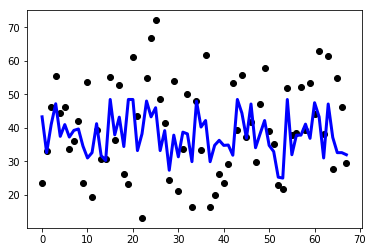

In [132]:
features = ['cement_component', 'flay_ash', 'water_component', 'superplasticizer', 'coarse_aggregate']

data_tr = data
data_tr=data_tr[(data_tr.T != 0).all()]

x_train, y_train, x_test, y_test = split_train_test(data_tr, features)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

plt.scatter(range(len(y_test)), y_test,  color='black')
plt.plot(y_pred, color='blue', linewidth=3)

print ('Features: %s'%str(features))
print ('R2 score: %f'%r2_score(y_test, y_pred))
print ('Intercept: %f'%regr.intercept_)
print ('Coefficients: %s'%str(regr.coef_))

### Ridge, Lasso or ElasticNet Regression

Ridge Regression: model = Ridge()<br>
Ridge regression seeks to add penalty scores to the residual of the sum of squares in regular linear regression.
This allows the model to become more **robust to collinearity** (when two variables are highly correlated** 

Lasso Regression: model = Lasso() <br>

ElasticNet: model = ElasticNet()

/Users/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/Users/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/Users/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/Users/adam/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0

Features: ['cement_component', 'flay_ash', 'water_component', 'superplasticizer', 'coarse_aggregate']
R2 score: 0.162372
Intercept: 89.044138
Coefficients: [ 0.04493909 -0.01548944 -0.19273891  0.19806866 -0.03044884]


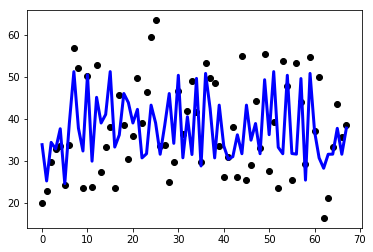

In [128]:
data_tr = data
data_tr=data_tr[(data_tr.T != 0).all()]

x_train, y_train, x_test, y_test = split_train_test(data_tr, features)

alphas = np.arange(0.1,5,0.1)

model = Ridge() ## REPLACE REGRESSION TYPE HERE!!
cv = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))

y_pred = cv.fit(x_train, y_train).predict(x_test)

plt.scatter(range(len(y_test)), y_test,  color='black')
plt.plot(y_pred, color='blue', linewidth=3)

print ('Features: %s'%str(features))
print ('R2 score: %f'%r2_score(y_test, y_pred))
print ('Intercept: %f'%regr.intercept_)
print ('Coefficients: %s'%str(regr.coef_))

### Gradient Boosted Regression

Single Gradient Boosted
> http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/ <br>
> https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

**Overview:** <br>
Gradient boosting is a method to fit multiple conditions to a regression problem. Working as a decision tree to scale weights of predictions with a learning rate to dampen the changes. The decision tree is then looped over to make many small steps in the right direction leading to a model with low variance. <br>
- The initial prediction is that our dependent variable prediction is the mean of the distribution
- The data is then grouped based on similar components (eg. gender, age)
- The residual is then calculated (observed - predicted)
- This is then multipled by the learning rate (between 0 - 1) **0.1 is usually pretty good**
- This then used to calculate a new predicted value (mean + (learning rate * residual)
    - Gives a small increase in accuracy over the mean
- A second tree is then made based on the predictions of the first tree
- Data is grouped based on categories and new residuals are calculated
    - if multiple values are in one leaf/bucket the mean is taken for calculating residuals
- For the predictions: becomes mean + (learning rate * 1st residual) + (learning rate * second residual)
- The result is that many small steps of improvement are made in making the model more accuracy while still accounting for variance

/Users/adam/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/adam/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/adam/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/adam/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

cement_component 0.34895135284485757
flay_ash 0.034124750956550653
water_component 0.3446260280378457
superplasticizer 0.2088578137252517
coarse_aggregate 0.23534330928143143


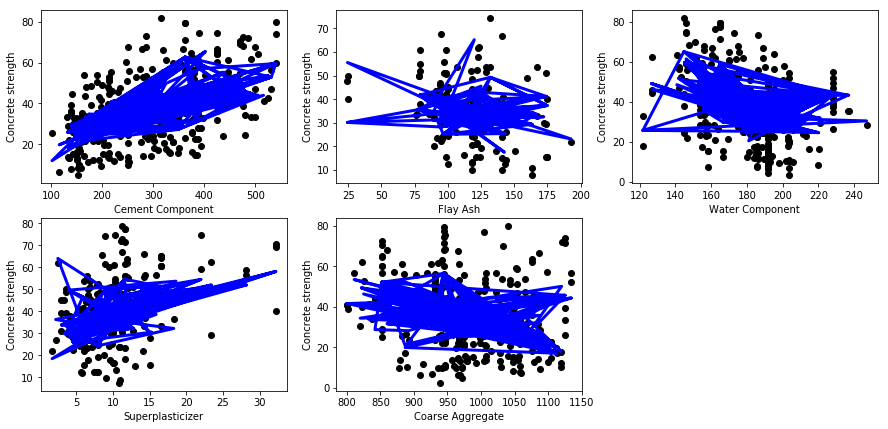

In [134]:
plt.figure(figsize=(15,7))
plot_count = 1

for feature in ['cement_component', 'flay_ash', 'water_component', 'superplasticizer', 'coarse_aggregate']:
    data_tr = data[['concrete_strength', feature]]
    data_tr=data_tr[(data_tr.T != 0).all()]

    x_train, y_train, x_test, y_test = split_train_test(data_tr, feature)

    # Create linear regression object
    regr = GradientBoostingRegressor()

    # Train the model using the training sets
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)

    # Plot outputs
    plt.subplot(2,3,plot_count)

    plt.scatter(x_test, y_test,  color='black')
    plt.plot(x_test, y_pred, color='blue',
             linewidth=3)
    plt.xlabel(feature.replace('_',' ').title())
    plt.ylabel('Concrete strength')

    print (feature, r2_score(y_test, y_pred))

    plot_count+=1

plt.show()

### Support Vector Regression (SVR)

**Single Support Vector Regression**

The below code is the same as the Linear regression except for:

**regr = SVR(kernel='linear')**

SVR uses a 'Kernel Trick' to transform non linear data to a higher dimentionality so that a linear line can be used to model the data.

SVR(kernal= **'n'** ) n = ‘linear’, ‘poly’, ‘rbf’ (default), ‘sigmoid’, ‘precomputed’ 

CEMENT COMPONENT
R2: cement_component vs furnace_slag = 0.0017238338687978194
R2: cement_component vs flay_ash = 0.1309063065274927
R2: cement_component vs water_component = -0.019974371426142445
R2: cement_component vs superplasticizer = 0.11456686961033746
R2: cement_component vs coarse_aggregate = -0.034870203828884394
R2: cement_component vs fine_aggregate = 0.06275265870479851
R2: cement_component vs age = -0.045233642188067025
R2: cement_component vs concrete_strength = 0.17869958482680448
FURNACE SLAG
R2: furnace_slag vs cement_component = 0.0823992111902685
R2: furnace_slag vs flay_ash = -0.03570864959943476
R2: furnace_slag vs water_component = -0.03131262702160198
R2: furnace_slag vs superplasticizer = -0.04720272845958662
R2: furnace_slag vs coarse_aggregate = -0.004336780756613701
R2: furnace_slag vs fine_aggregate = 0.05228581456881942
R2: furnace_slag vs age = -0.06876205418061865
R2: furnace_slag vs concrete_strength = -0.00670769958228945
FLAY ASH
R2: flay_ash vs cement

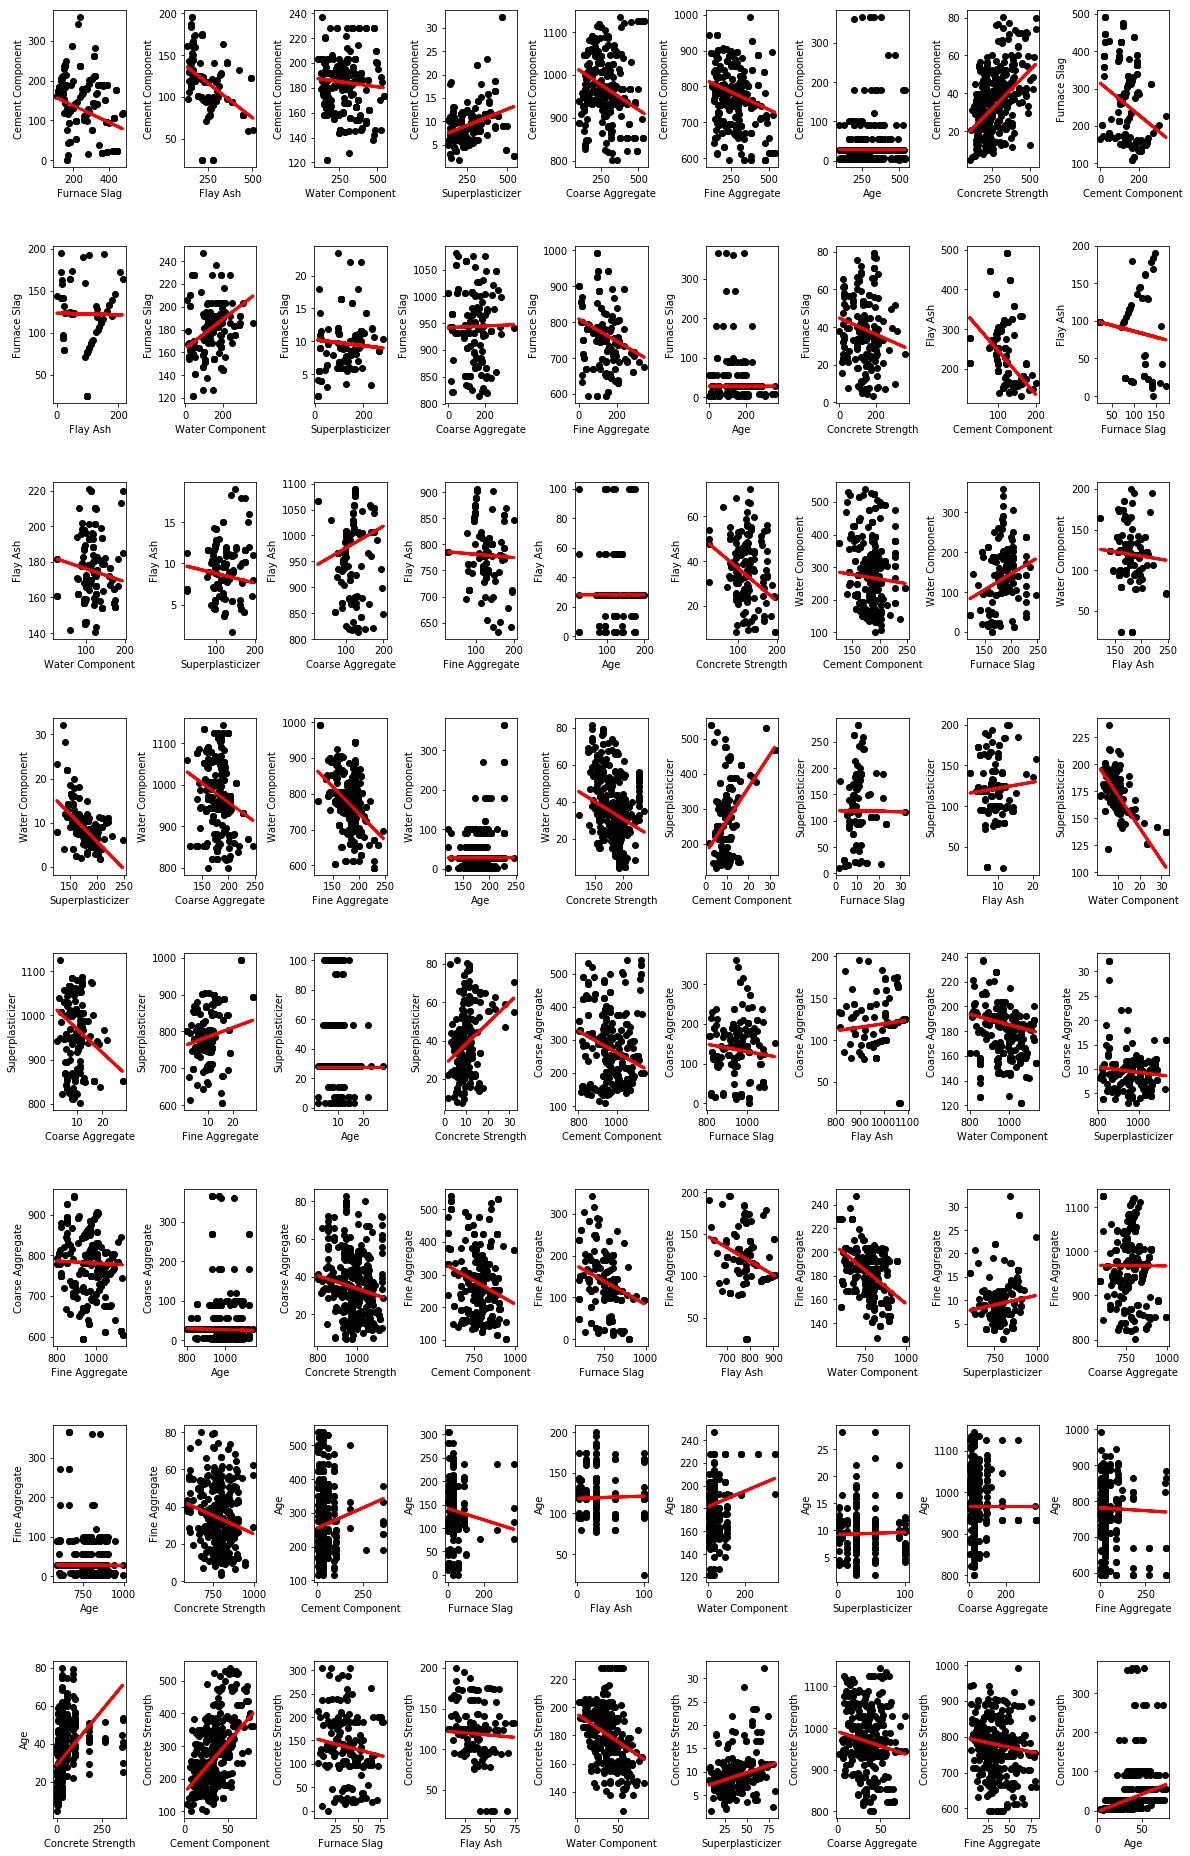

In [140]:
import warnings  
warnings.filterwarnings('ignore')


plt.figure(figsize=(20,120))
plot_count = 1

for featurex in data.columns:
    print('\033[0m' + featurex.replace('_',' ').upper())
    
    for featurey in data.columns:
        
        if featurex == featurey:
            plot_count = plot_count
        
        else:
            
            data_tr = data[[featurex, featurey]]
            data_tr=data_tr[(data_tr.T != 0).all()]

            x_train, y_train, x_test, y_test = split_train_test(data_tr, featurex, featurey)

            # Create linear regression object
            regr = SVR(kernel='linear')

            # Train the model using the training sets
            regr.fit(x_train, y_train)
            y_pred = regr.predict(x_test)

            # Plot outputs
            plt.subplot(28, len(data.columns),plot_count)

            plt.scatter(x_test, y_test,  color='black')
            plt.plot(x_test, y_pred, color='red', linewidth=3)
            plt.xlabel(featurey.replace('_',' ').title())
            plt.ylabel(featurex.replace('_',' ').title())
            plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=0.5) #Adjust the spacing between plots
            if r2_score(y_test, y_pred) >= 0.1:
                print ('\033[1m' + "R2:", featurex,"vs",featurey,"=", r2_score(y_test, y_pred))
            else:
                print ('\033[0m' + "R2:", featurex,"vs",featurey,"=", r2_score(y_test, y_pred))

            plot_count+=1

plt.show()

#LOTS OF ERROR WARNINGS!!